In [1]:
from afmario import BoruvkasAlgorithmSingleMachine, Graph, BoruvkasAlgorithm
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

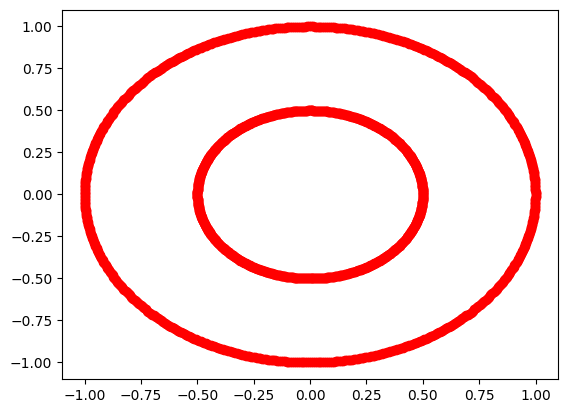

In [2]:
import math

n_samples = 1500
V, y = make_circles(n_samples=n_samples, factor=.5, noise=0.00)

points = V

def generate_graph(points):
    G = Graph()
    G.points = points

    # add a vertex for each point (map vertex id to xy data from points list)
    for i in range(len(points)):
        G.add_vertex(i)

    # add an edge for each possible point
    for i in G.V:
        for j in G.V:
            if i == j:
                continue

            (x1, y1) = G.points[i]
            (x2, y2) = G.points[j]

            w = math.ceil(math.sqrt((x1 - x2)**2 + (y1 - y2)**2))
            G.add_edge(i, j, w)

    return G

Gcircles1 = generate_graph(points)

def generate_plot_for_graph(G):

    plt.figure()

    xs, ys = [], []
    for x in G.V.keys():
        xs.append(G.points[x][0])
        ys.append(G.points[x][1])

    plt.scatter(xs, ys, c='r')

generate_plot_for_graph(Gcircles1)

In [3]:
max_iterations = 10
alg = BoruvkasAlgorithm(Gcircles1, max_iterations)
L, Vs, Es = alg.run()

running boruvkas algorithm: max_iterations = 10
Graph:
round 1
neighborhoods: ['(1497, {0, 1, 3, 4, 5, 7, 9, 10, 11, 13, 14, 16, 18, 19, 21, 24, 25, 26, 27, 28, 29, 32, 34, 36, 37, 38, 39, 40, 42, 43, 44, 46, 48, 50, 51, 53, 55, 57, 60, 62, 63, 65, 66, 67, 68, 70, 71, 73, 75, 76, 78, 79, 80, 81, 82, 83, 84, 86, 89, 91, 96, 98, 99, 102, 104, 106, 107, 108, 109, 111, 114, 116, 117, 119, 120, 122, 123, 125, 126, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 145, 147, 148, 149, 150, 154, 155, 157, 158, 160, 161, 164, 165, 167, 169, 172, 174, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 199, 201, 203, 207, 208, 209, 214, 215, 216, 217, 219, 220, 221, 224, 226, 227, 228, 229, 233, 235, 236, 237, 239, 240, 241, 243, 246, 247, 249, 250, 253, 255, 257, 258, 262, 263, 266, 267, 269, 270, 272, 273, 274, 281, 282, 283, 284, 286, 288, 289, 291, 292, 294, 295, 296, 297, 300, 302, 305, 306, 309, 310, 316, 317, 318, 319, 320, 321, 323, 32

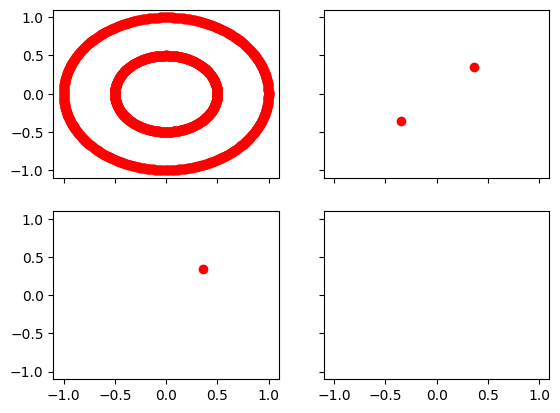

In [5]:
def plot_graph(V, E, points, ax):
    xs, ys = [], []
    for x in V.keys():
        xs.append(points[x][0])
        ys.append(points[x][1])

    # print(xs, ys)
    ax.scatter(xs, ys, c='r')

n = len(Vs)
fig, axarr = plt.subplots(2, 2, sharex='all', sharey='all')
for ax, i in zip(axarr.ravel(), range(len(axarr) + 1)):
    V = Vs[i]
    E = Es[i]
    plot_graph(V, E, points, ax)
